任务一：
针对微博数据中的主题为“疫情”的微博，对其“热搜内容”进行分词，计算词出现的次数，将出现次数前20名的动词输出，将出现次数前20名的名词输出，并采用“词云”可视化输出（可以定义多个时间段，看舆情的变化）

In [1]:
# Date: 2023.3.24
# Editor: ThreeLiu
# Course: NLP

import pandas as pd
import jieba
import wordcloud
from collections import Counter
import os

weibo_path = '微博热搜标注.xlsx'
rumor_path = 'DXYRumors.csv'
# detect_date='2020-02-21'
year = '2020'
month = '02'
date = '21'


In [2]:
weibo_data = pd.read_excel(weibo_path)
df_weibo = pd.DataFrame(weibo_data)
rumor_path = pd.read_csv(rumor_path)
df_rumor = pd.DataFrame(rumor_path)

In [3]:
# 显示所有可用时间
time = []
for i in list(df_weibo.时间.unique()):
    i = str(i)[:10]
    if len(i) == 10:
        time.append(i)
print(time)

['2020-02-21', '2020-02-20', '2020-02-19', '2020-02-18', '2020-02-17', '2020-02-16', '2020-02-15', '2020-02-14', '2020-02-13', '2020-02-12', '2020-02-11', '2020-02-10', '2020-02-09', '2020-02-08', '2020-02-07', '2020-02-06', '2020-02-05', '2020-02-04', '2020-02-03', '2020-02-02', '2020-02-01', '2020-01-31', '2020-01-30', '2020-01-29', '2020-01-28', '2020-01-27', '2020-01-26', '2020-01-25', '2020-01-24', '2020-01-23', '2020-01-22', '2020-01-21', '2020-01-20', '2020-01-19', '2020-01-18', '2020-01-16', '2020-01-15', '2020-01-14', '2020-01-11', '2020-01-09']


In [4]:
entity_list = ['新型冠状病毒/8/nz', '冠状病毒/8/nz','疫情地图/8/nz','武汉肺炎/8/nz','人传人/8/n','病毒/8/nz','疫情/8/nz',
               '病例','新冠/8/nz', 'SARS/8/nz','隔离', '口罩', '卫健委/5/nt','双黄连/8/nz','埃博拉/3/nz','瑞德西韦/5/nz',
           '金银潭/5/nz','百步亭/5/nz','火神山/5/nz','雷神山/5/nz','张家界/5/ns', '小汤山/5/nz','威斯特丹号/5/nz','钻石公主号/5/nz',
               '方舱医院/5/nz','同济医院/3/nz','协和医院/3/nz','紫外线', '蝙蝠/3/nz','酒精','消毒','确诊','连闯/2/v',
               '康复/3/n','封城/3/n','汤圆/3/n', '武软/3/nt', '红十字会/3/nt', '马拉松/3/n', '小姐姐/3/r',
               '医护人员/5/nr','医疗队/5/nr','医院院长/5/nr','张定宇/5/nr','护士/5/nr','医生/5/nr',
               '钟南山/5/nr', '李兰娟/5/nr','李文亮/5/nr', '应勇/5/nr','王贺胜/5/nr', '王忠林/5/nr']
for w in entity_list:
    #print(w)
    w_list = w.split('/')
    freq, tag = 1, None
    if len(w_list) > 1:
        # [word freq]
        freq = w_list[1]
    if len(w_list) > 2:
        # [word freq tag]
        tag = w_list[2]
    #jieba.add_word(w)
    jieba.add_word(w_list[0], freq=freq, tag=tag)


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\17248\AppData\Local\Temp\jieba.cache
Loading model cost 0.575 seconds.
Prefix dict has been built successfully.


In [5]:
def show_weibo_cloud(time, year, month, date, key_word: str):
    epidemic_dir = {}
    detect_dates = []
    detect_date = year + '-' + month + '-' + date
    if detect_date in time:
        detect_dates.append(detect_date)
    else:
        print('输入日期不在可用日期范围内')
        return None
    detect_date = year + '-' + month + '-' + str(int(date) + 1)
    if detect_date in time:
        detect_dates.append(detect_date)
    detect_date = year + '-' + month + '-' + str(int(date) - 1)
    if detect_date in time:
        detect_dates.append(detect_date)
    # 根据关键词和时间筛选数据
    for i in range(len(df_weibo)):
        if key_word in str(df_weibo.主题[i]) and any(time in str(df_weibo.时间[i]) for time in detect_dates):
            epidemic_dir[i] = df_weibo.主题[i]
    # print(epidemic_dir)
    index = list(epidemic_dir.keys())
    # print(len(index))
    words = []
    # 分词
    for content in df_weibo.热搜内容[index]:
        words.extend(jieba.lcut(content))
    # print(len(words))
    word_count = Counter(words)
    word_count = sorted(word_count.items(), key=lambda x: x[1], reverse=True)
    # print(word_count[:20])
    from jieba import posseg
    import matplotlib.pyplot as plt

    v = []
    n = []
    v_dict = {}
    n_dict = {}
    for word in word_count:
        if posseg.lcut(word[0])[0].flag == 'v':
            v.append(word[0])
            v_dict[word[0]] = word[1]
        elif posseg.lcut(word[0])[0].flag == 'n':
            n.append(word[0])
            n_dict[word[0]] = word[1]
        else:
            continue
        if len(v) >= 20 and len(n) >= 20:
            break

    print("排名前{}的动词为:{}".format(len(v[:20]), v[:20]))
    print("排名前{}的名词为:{}".format(len(n[:20]), n[:20]))
    # 输出词云
    v_cloud = wordcloud.WordCloud(font_path='C:/Windows/Fonts/simhei.ttf', background_color='white', width=1000,
                                  height=700).generate_from_frequencies(v_dict)
    n_cloud = wordcloud.WordCloud(font_path='C:/Windows/Fonts/simhei.ttf', background_color='white', width=1000,
                                  height=700).generate_from_frequencies(n_dict)
    # 针对plt进行rgb转换
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.title('WordCloud_v(date={})'.format(year + '-' + month + '-' + date))
    plt.imshow(v_cloud)
    plt.axis('off')
    plt.subplot(122)
    plt.title('WordCloud_n(date={})'.format(year + '-' + month + '-' + date))
    plt.imshow(n_cloud)
    plt.axis('off')
    plt.show()

排名前17的动词为:['例', '感染', '发热', '确诊', '新增', '肯定', '严防', '看', '懂', '发现', '来', '有', '发布', '高发', '观察', '称', '可治']
排名前15的名词为:['肺炎', '病例', '医务人员', '人传人', '春运', '传染性', '门诊', '名单', '症状', '患者', '病毒性', '注意事项', '来源', '专家', '总体']


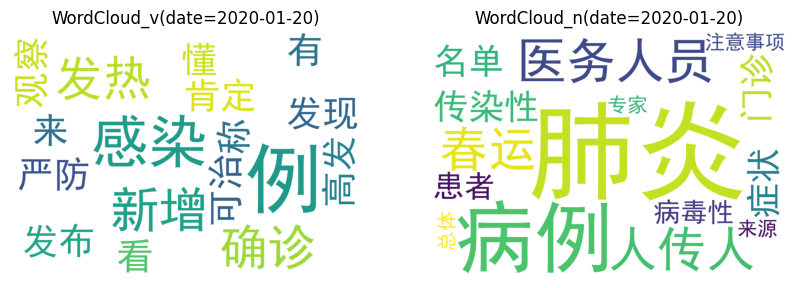

In [6]:
show_weibo_cloud(time, year='2020', month='01', date='20', key_word='疫情')

任务二：
针对微博数据中的主题为“政府”的微博，对其“热搜内容”进行分词，计算词出现的次数，将出现次数前20名的动词输出，将出现次数前20名的名词输出，并采用“词云”可视化输出。（可以定义多个时间段，看随着时间的舆情变化）

排名前8的动词为:['负担', '确诊', '疑似', '付费', '安排', '回应', '求助', '处理']
排名前9的名词为:['肺炎', '个人', '财政', '患者', '费用', '资金', '副省长', '网络', '公职人员']


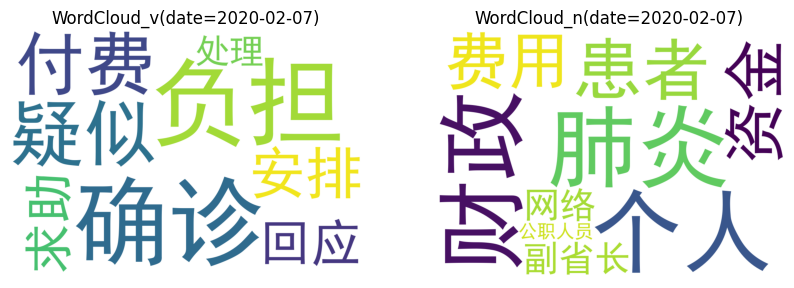

In [7]:
show_weibo_cloud(time, year='2020', month='02', date='07', key_word='政府')